In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functions import *

def get_eigenvector(alpha_target, omega_target, m, Jet, Nr = 250):
    err, M = dispersion_relation(omega_target,alpha_target,m,Jet)
    if err>1e-10:
        print(f'Warning: M determinant = {np.round(err,5)}') 

    Coeff_vect = null(M)
    Do = Coeff_vect[0]
    Cl = Coeff_vect[1]
    Dl = Coeff_vect[2]
    Ci = Coeff_vect[3]

    r = np.linspace(0,5,Nr)
    p = np.zeros(Nr,dtype='complex')
    for i in range(Nr):
        if r[i]<Jet.Rin:
            beta_i = beta(omega_target,alpha_target,m,Jet,type='i')
            p[i] = Ci*Im(m,beta_i*r[i])
        elif r[i]>=Jet.Rin and r[i]<=Jet.Rout:
            beta_l = beta(omega_target,alpha_target,m,Jet,type='l')
            p[i] = Cl*Im(m,beta_l*r[i])+Dl*Km(m,beta_l*r[i])
        else:
            beta_o = beta(omega_target,alpha_target,m,Jet,type='o')
            p[i] = Do*Km(m,beta_o*r[i]) 
    return p, r

class Jet_class:
    Si = 0.1
    Sl = 0.1
    Ar = 0.1
    Rout = 0.5
    Ui = -0.3
    Uo = 0
    Ul = 1
    Rin = (1-Ar)*Rout
    

C:\Users\B0770858\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  app.launch_new_instance()


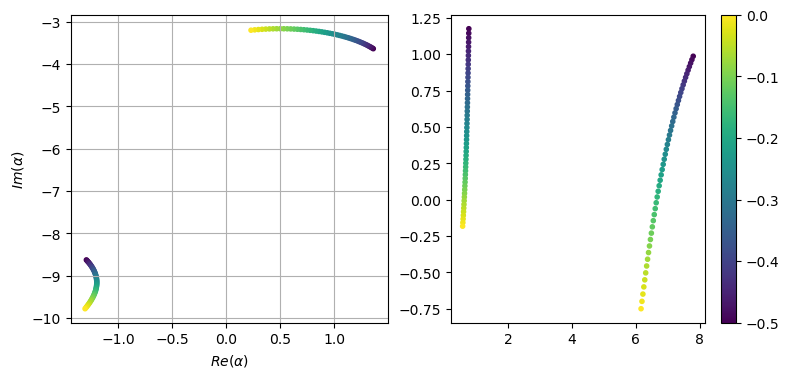

In [50]:
file_name = 'Ar01_Uin-03_m1.txt'

with open('./alpha_'+file_name,'rb') as f:
    alphas = pickle.load(f)
with open('./omega_'+file_name,'rb') as f:
    omegas = pickle.load(f)

Ns, Np  = np.shape(alphas)
fig, ax = plt.subplots(ncols=2, figsize=(9,4))
Ui = np.linspace(-0.5,0,50)
for j in range(Ns):
    cb = ax[0].scatter(np.real(alphas[j,:]),np.imag(alphas[j,:]),marker='.',c=Ui)
    ax[1].scatter(np.real(omegas[j,:]),np.imag(omegas[j,:]),marker='.',c=Ui)

ax[0].set_xlabel(r'$Re(\alpha)$')
ax[0].set_ylabel(r'$Im(\alpha)$')
fig.colorbar(cb)
# ax.set_xlim((-1,5))
# ax.set_ylim((-5,0))
ax[0].grid(True)
plt.show()

8.673714251895348e-09
Norm M x Null space = 6.961243687883865e-09


C:\Users\B0770858\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.


5.002785420741768e-08
Norm M x Null space = 1.1644854144315368e-08


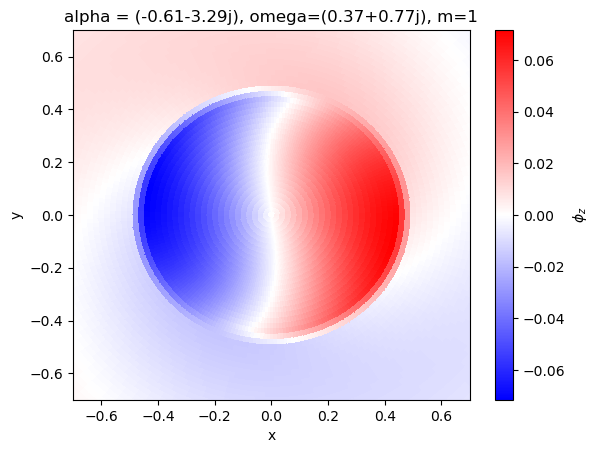

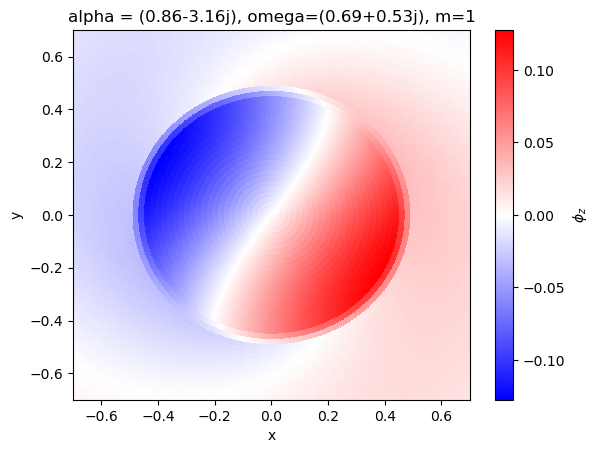

In [31]:
m = 1
id_list = [41,42]
Jet = Jet_class()
Ntheta = 250
theta = np.linspace(0,2*np.pi,Ntheta)
for i in id_list:
    err = np.linalg.norm(fsaddle([np.real(omegas[i]),np.imag(omegas[i]),np.real(alphas[i]),np.imag(alphas[i])],m,Jet))
    print(err)
    if err<1e-5:
        p, r = get_eigenvector(alphas[i],omegas[i],m,Jet)
        # if i ==0:
        RR, Theta = np.meshgrid(r,theta)
        X =RR*np.cos(Theta) 
        Y =RR*np.sin(Theta) 
        
        P = np.tile(p,(Ntheta,1))*np.exp(1j*m*Theta)
        fig, ax = plt.subplots()
        vlim = np.max(np.abs(P))
        cb = ax.pcolor(X,Y,np.real(P), cmap='bwr',vmin=-vlim, vmax=vlim)
        plt.colorbar(cb,label=r'$\phi_z$')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_xlim(-0.7,0.7)
        ax.set_ylim(-0.7,0.7)
        # ax.grid(True)
        ax.set_title(f'alpha = {np.round(alphas[i],2)}, omega={np.round(omegas[i],2)}, m={m}')

In [37]:
o_select = (np.abs(np.imag(omegas))<4)*(np.real(omegas)<8)*(np.real(omegas)>0)
print(omegas[o_select])
print(alphas[o_select])

[0.14949091+2.80203202j 0.37485054+0.7703262j  0.69122075+0.53298539j
 3.45090591-1.27863761j 7.10965307+0.49925314j]
[-0.10879169-10.94896272j -0.61225411 -3.29031877j
  0.85848979 -3.15568383j  1.92147059-10.80443551j
 -1.18322629 -9.0220082j ]


In [39]:
Jet.Si = 0
print(Jet.Si)


0
